In [ ]:
import glob
import os
import pandas as pd

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-oscarpy
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-c4py

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-oscar-repetitions
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-c4-repetitions
!cp -r lm1-2b8-55b-oscar-repetitions/2b855b55boscar lm1-2b8-55b-oscarpy/
!cp -r lm1-2b8-55b-c4-repetitions/2b855b55bc4 lm1-2b8-55b-c4py/

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-oscarseeds
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-2b8-55b-c4seeds
!cp -r lm1-2b8-55b-oscarseeds/* lm1-2b8-55b-oscarpy/
!cp -r lm1-2b8-55b-c4seeds/* lm1-2b8-55b-c4py/

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4py
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4pyseeds
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4-repetitions
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4seeds
!cp -r lm1-4b2-84b-c4-repetitions/4b284b84bc4v2 lm1-4b2-84b-c4py/
!cp -r lm1-4b2-84b-c4seeds/* lm1-4b2-84b-c4py/
!cp -r lm1-4b2-84b-c4pyseeds/* lm1-4b2-84b-c4py/

!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4-dedup
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4-perplexity
!cp -r lm1-4b2-84b-c4-repetitions/4b284b84bc4v2 lm1-4b2-84b-c4-perplexity/
!cp -r lm1-4b2-84b-c4seeds/4b284b84b* lm1-4b2-84b-c4-perplexity/
!cp -r lm1-4b2-84b-c4-dedup/* lm1-4b2-84b-c4-perplexity/


!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-oscar-perplexity
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-oscar-repetitions
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-oscarseeds
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-oscar-dedup
!cp -r lm1-4b2-84b-oscar-repetitions/4b284b84b* lm1-4b2-84b-oscar-perplexity/
!cp -r lm1-4b2-84b-oscarseeds/4b284b84b* lm1-4b2-84b-oscar-perplexity/
!cp -r lm1-4b2-84b-oscar-dedup/* lm1-4b2-84b-oscar-perplexity/

TASK_TO_BASELINE = {
    "anli_r1": 1/3,
    "anli_r2": 1/3,
    "anli_r3": 1/3,
    "arc_challenge": 1/4,
    "arc_easy": 1/4,
    "boolq": 1/2,
    "cb": 1/3,
    "copa": 1/2,
    "hellaswag": 1/4,
    "piqa": 1/2,
    "rte": 1/2,
    "sciq": 1/4,
    "storycloze_2016": 1/4,
    "winogrande": 1/2,
    "babi": 0,
}


MODELS = {
    "lm1-2b8-55b-c4py": {
        "2b855b50c4py",
        "2b855b60c4py",
        "2b855b70c4py",
        "2b855b80c4py",
        "2b855b90c4py",
        "2b855b55bc4",
        "2b855b55bc4seed1",
        "2b855b55bc4seed2",
        "2b855b55bc4seed3",
        "2b855b55bc4seed4",
    },
    "lm1-2b8-55b-oscarpy": {
        "2b855b50oscarpy",
        "2b855b60oscarpy",
        "2b855b70oscarpy",
        "2b855b80oscarpy",
        "2b855b90oscarpy",
        "2b855b55boscar",
        "2b855b55boscarseed1",
        "2b855b55boscarseed2",
        "2b855b55boscarseed3",
        "2b855b55boscarseed4",
    },
    "lm1-4b2-84b-c4py": {
        "4b284b84b10c4py",
        "4b284b84b20c4py",
        "4b284b84b30c4py",
        "4b284b84b40c4py",
        "4b284b84b50c4py",
        "4b284b84b60c4py",
        "4b284b84b70c4py",
        "4b284b84b80c4py",
        "4b284b84b90c4py",
        "4b284b84bc4v2",
#        "4b284b84bc4v2seed1",
#        "4b284b84bc4v2seed2",
#        "4b284b84bc4v2seed3",
#        "4b284b84bc4v2seed4",
    },
    "lm1-4b2-84b-c4-repetitions": {
        "4b284b1b9c4",
        "4b284b6bc4",
        "4b284b12bc4",
        "4b284b17bc4",
        "4b284b21bc4",
        "4b284b28bc4",
        "4b284b42bc4",
        "4b284b84bc4v2",
  },
  "lm1-4b2-84b-oscar-perplexity": {  
      "4b284b84boscar",
      "4b284b84boscarseed1",
      "4b284b84boscarseed2",
      "4b284b84boscarseed3",
      "4b284b84boscarseed4",
      "4b284b84boscardedup25expanded",
      "4b284boscarperplexity25",
  },
  "lm1-4b2-84b-c4-perplexity": {    
      "4b284b84bc4v2",
      "4b284b84bc4v2seed1",
      "4b284b84bc4v2seed2",
      "4b284b84bc4v2seed3",
      "4b284b84bc4v2seed4",
      "4b284bc4dedup",
      "perplexity25",
      "perplexity50",
      "perplexity",      
  }      
}

MODEL_TO_FEWSHOT_SCORES = {}
MODEL_TO_FEWSHOT_SCORES_ACC = {}
MODEL_TO_FEWSHOT_SCORES_GEN = {}

SHOTS = list(range(6))

for (BASE_MODEL, MODELS) in MODELS.items():
    MODEL_TO_FEWSHOT_SCORES.setdefault(BASE_MODEL, {})
    MODEL_TO_FEWSHOT_SCORES_ACC.setdefault(BASE_MODEL, {})
    MODEL_TO_FEWSHOT_SCORES_GEN.setdefault(BASE_MODEL, {})

    if ("-repetitions" in BASE_MODEL) and (os.path.isdir(BASE_MODEL.replace("-repetitions", "seeds"))):
        !cp -r {BASE_MODEL.replace("-repetitions", "seeds")}/* {BASE_MODEL}/
        MODELS |= {f"{MODEL}seed{seed}" for MODEL in MODELS for seed in [1, 2, 3, 4]}
    elif ("-c4py" in BASE_MODEL) and (os.path.isdir(BASE_MODEL.replace("-c4py", "-c4pyseeds"))):
        MODELS |= {f"{MODEL}seed{seed}" for MODEL in MODELS for seed in [1, 2, 3, 4]}
    for MODEL in MODELS:
        MODEL_TO_FEWSHOT_SCORES[BASE_MODEL].setdefault(MODEL, {})
        MODEL_TO_FEWSHOT_SCORES_ACC[BASE_MODEL].setdefault(MODEL, {})
        MODEL_TO_FEWSHOT_SCORES_GEN[BASE_MODEL].setdefault(MODEL, {})

        path = f"{BASE_MODEL}/{MODEL}/evaluation/generation/merged.csv"
        if not os.path.exists(path):
            print("Skipping: ", f"{BASE_MODEL}/{MODEL}")
            continue
        generation = pd.read_csv(path)
        for SHOT in SHOTS: 
              
            MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL].setdefault(SHOT, {})
            MODEL_TO_FEWSHOT_SCORES_ACC[BASE_MODEL][MODEL].setdefault(SHOT, {})
            MODEL_TO_FEWSHOT_SCORES_GEN[BASE_MODEL][MODEL].setdefault(SHOT, {})

            rankeval_files = glob.glob(f"{BASE_MODEL}/{MODEL}/evaluation/rankeval/*_{SHOT}.csv")
            assert len(rankeval_files) == 1, f"{rankeval_files}"
            rankeval = pd.read_csv(rankeval_files[0])

            # Rescale to 0 - 1, where 0 is random performance
            rankeval["normalized"] = rankeval.apply(lambda x: (x["value"] - TASK_TO_BASELINE[x["task"]]) / (1 - TASK_TO_BASELINE[x["task"]]), axis=1)
            rankeval = rankeval[rankeval["metric"] == "acc"]
            rankeval_scores = rankeval.normalized.values.tolist()

            gen_sub = generation[generation["fewshots"] == SHOT]
            gen_sub = gen_sub[gen_sub["prompt"] != "median"]
            gen_sub = gen_sub[gen_sub["prompt"] != "average"]

            # 0 is already random performance, i.e. no rescaling necessary
            generation_scores = gen_sub.value.values.tolist()
            scores = rankeval_scores + generation_scores
            average_score = sum(scores) / len(scores)

            for i, row in rankeval.iterrows():
                MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL][SHOT][row["task"]] = row["normalized"]
            for i, row in gen_sub.iterrows():
                MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL][SHOT][row["dataset"]] = row["value"]

            babi_files = glob.glob(f"{BASE_MODEL}/{MODEL}/evaluation/*{SHOT}_babi.json")
            if len(babi_files) == 1:
                import json
                with open(babi_files[0], "r") as f:
                    MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL][SHOT]["babi"] = json.load(f)["results"]["babi"]["em"]
            else:
                print(f"Missing bAbI: {BASE_MODEL}/{MODEL}")

            #MODEL_TO_FEWSHOT_SCORES[BASE_MODEL][MODEL][SHOT]
            #MODEL_TO_FEWSHOT_SCORES_ACC[BASE_MODEL][MODEL].append(sum(rankeval_scores) / len(rankeval_scores))
            #MODEL_TO_FEWSHOT_SCORES_GEN[BASE_MODEL][MODEL].append(sum(generation_scores) / len(generation_scores))


Cloning into 'lm1-2b8-55b-oscarpy'...
remote: Enumerating objects: 2037, done.
remote: Counting objects: 100% (769/769), done.
remote: Compressing objects: 100% (463/463), done.
remote: Total 2037 (delta 310), reused 764 (delta 305), pack-reused 1268
Receiving objects: 100% (2037/2037), 4.35 MiB | 23.58 MiB/s, done.
Resolving deltas: 100% (358/358), done.
Cloning into 'lm1-2b8-55b-c4py'...
remote: Enumerating objects: 2090, done.
remote: Counting objects: 100% (1692/1692), done.
remote: Compressing objects: 100% (1433/1433), done.
remote: Total 2090 (delta 259), reused 1684 (delta 254), pack-reused 398
Receiving objects: 100% (2090/2090), 8.42 MiB | 20.18 MiB/s, done.
Resolving deltas: 100% (317/317), done.
Cloning into 'lm1-2b8-55b-oscar-repetitions'...
remote: Enumerating objects: 3266, done.
remote: Counting objects: 100% (3164/3164), done.
remote: Compressing objects: 100% (2731/2731), done.
remote: Total 3266 (delta 440), reused 3148 (delta 427), pack-reused 102
Receiving objects:

Num tasks:  19
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:  19
Num tasks:

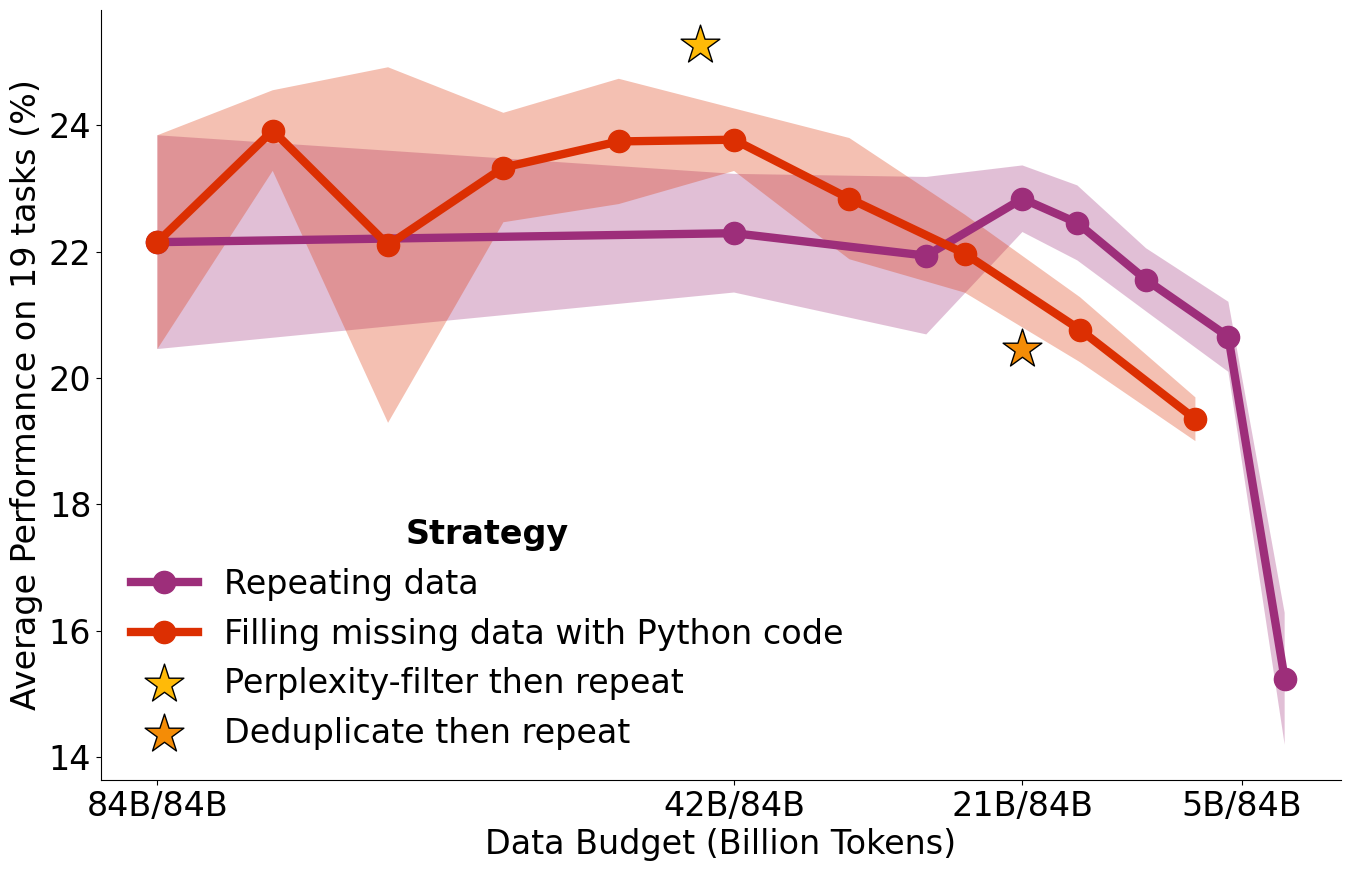

In [ ]:
from matplotlib.cm import unregister_cmap
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

random.seed(42)
np.random.seed(42)

FONTSIZE = 24
FONTSIZE_SMALL = 16


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))

ax.set_ylabel("Average Performance on 19 tasks (%)", fontsize=FONTSIZE)
ax.set_xlabel("Data Budget (Billion Tokens)", fontsize=FONTSIZE)
#ax.set_xlabel("Data Budget", fontsize=FONTSIZE)


#ax_flt.set_ylabel("Validation loss", fontsize=12)
### Options for Py Plot
# Bar: 
## Group of bars for each percentage increasing left to right (e.g. leftmost is 0% w/ avg, babi.. scores, then 10%..)
### ---: People will compare avg vs babi, but that's not maeningful
## Group of bars for each task (E.g. leftmost is average, then bAbi, ...)
### ---: 10 bars for each task -> Can split them into two rows, so 40 total bars
### ---: For bAbI the first bar will be invisible -> Can do improvement over 0 instead, but then relative or absolute? If absolute average score will be tiny; Relative babi will be inf
# Line:
## Line for each score (Avg, bAbi etc)
### ---: People will compare avg vs babi (i.e. the two differnet lines), but that's not meaningful; Need to compare across len of the line!
#### Step plot would put the focus back on comparing the line across itself, but it's ambiguous what the exact performance is at a certain %

### Options for Filtering Plot
# Bar:
## 2 Groups of bars, one for C4, one for OSCAR
### OSCAR: 2.8B/4.2B unique; 4.2B dedup; 4.2B pplx
### C4: 2.8B/4.2B unique ; 2.8B dedup (4.2B: WIP) ; 2.8B / 4.2B: WIP


# "4b284b84bc4v2seed1", "4b284b84bc4v2seed2", "4b284b84bc4v2seed3", "4b284b84bc4v2seed4",

colors = ["#03071E", "#6A040F", "#D00000", "#DC2F02", "#E85D04", "#F48C06",  "#FAA307", "#FFBA08"]#,  "#E85D04", "#F48C06",  "#FAA307", "#FFBA08"]


ckpts = ['4b284b84bc4v2', '4b284b42bc4', '4b284b28bc4', '4b284b21bc4', '4b284b17bc4', '4b284b12bc4', '4b284b6bc4', '4b284b1b9c4']
data = [84e9, 42e9, 28e9, 21e9, 17e9, 12e9, 6e9, 1.9e9]


scores = []
scores_std = []
for model in ckpts:
    scores_tasks = []
    for sub_model in [model, model + "seed1", model + "seed2", model + "seed3", model + "seed4"]:
        scores_tasks_sub = []
        for task in MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4-repetitions'][sub_model][0]:
            scores_tasks_sub.append(np.mean([MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4-repetitions'][sub_model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
        print("Num tasks: ", len(scores_tasks_sub))
        # Add bAbI if missing; All non-code models scored 0
        if len(scores_tasks_sub) == 18:
            scores_tasks_sub.append(0)
        assert len(scores_tasks_sub) == 19
        scores_tasks.append(np.mean(scores_tasks_sub))

    scores.append(np.mean(scores_tasks)*100)
    scores_std.append(np.std(scores_tasks)*100)
"""
ax_py.errorbar(
    [(x/84e9)*100 for x in data],
    scores, 
    yerr=scores_std,
)
"""
#"""
ax.plot(
    #[(x/84e9)*100 for x in data],
    data,
    scores,
    color="#9d2e7a",#colors[-5],
    label="Repeating data",
    marker=".",
    markersize=32,
    linewidth=6.0,
)

ax.fill_between(
    data,
    np.array(scores) - np.array(scores_std), 
    np.array(scores) + np.array(scores_std),
    alpha=0.3,
    facecolor="#9d2e7a",#colors[-5],
)

c4py = ["4b284b84b90c4py", "4b284b84b80c4py", "4b284b84b70c4py", "4b284b84b60c4py", "4b284b84b50c4py", "4b284b84b40c4py", "4b284b84b30c4py", "4b284b84b20c4py", "4b284b84b10c4py",]
"""
scores = [scores[0]]
scores_std = [scores_std[0]]
for model in c4py:
    scores_tasks = []
    for task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][0]:
        scores_tasks.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
    
    scores.append(np.mean(scores_tasks) * 100)
    scores_std.append(np.std(scores_tasks) * 100)
"""

scores = [scores[0]]
scores_std = [scores_std[0]]
for model in c4py:
    scores_tasks = []
    for sub_model in [model, model + "seed1", model + "seed2", model + "seed3", model + "seed4"]:
        scores_tasks_sub = []
        if sub_model not in MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4py']:
            print("Missing model: ", sub_model)
            continue
        for task in MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4py'][sub_model][0]:
            if sum([task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][sub_model][shot] for shot in [0, 1, 2, 3, 4, 5]]) == 6:
                scores_tasks_sub.append(np.mean([MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4py'][sub_model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
            else:
                print("Missing task: ", model, task)
        print("Num tasks: ", len(scores_tasks_sub))
        # Add bAbI if missing; All non-code models scored 0
        if len(scores_tasks_sub) == 18:
            scores_tasks_sub.append(0)
        assert len(scores_tasks_sub) == 19
        scores_tasks.append(np.mean(scores_tasks_sub))

    scores.append(np.mean(scores_tasks)*100)
    scores_std.append(np.std(scores_tasks)*100)

data = [84e9*(x/100) for x in range(10, 110, 10)][::-1]

ax.plot(
    data,
    scores,
    color=colors[-5],#"black",#colors[-5],
    label="Filling missing data with Python code",
    linewidth=6.0,
    marker=".",
    markersize=32,    
)

ax.fill_between(
    data,
    np.array(scores) - np.array(scores_std), 
    np.array(scores) + np.array(scores_std),
    alpha=0.3,
    facecolor=colors[-5],#"black",#colors[-5],
)



c4py = ["4b284b84bc4v2", "4b284b84b90c4py", "4b284b84b80c4py", "4b284b84b70c4py", "4b284b84b60c4py", "4b284b84b50c4py", "4b284b84b40c4py", "4b284b84b30c4py", "4b284b84b20c4py", "4b284b84b10c4py",]

"""
task = "babi"
scores = []
for model in c4py:
    scores.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))

ax.plot(
    list(range(10, 110, 10))[::-1],
    scores,
    color=colors[-5],
    label="Performance on bAbI",
    linewidth=4.0,
    marker=".",
    markersize=16,    
)


task = "web_nlg_en"
scores = []
for model in c4py:
    scores.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))

lines_webnlg = ax_py.plot(
    list(range(10, 110, 10))[::-1],
    scores,
    color=colors[-7],
    label="Performance on WebNLG",
    linewidth=4.0,
    marker=".",
    markersize=16,    
)
"""


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#ax_flt.set_title(r'Filtering', fontsize=FONTSIZE, pad=16, fontweight="bold")
#ax_flt.tick_params(axis='both', which='major', labelsize=FONTSIZE_SMALL)

scores = []
flt = [
      "perplexity25",
      "perplexity50",       
      "4b284bc4dedup",       
]
dset_size = [
    178e9/4,
    178e9/2,
    21e9,
]

for model in flt:
    scores_tasks = []
    for task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4-perplexity"][model][0]:
        if sum([task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4-perplexity"][model][shot] for shot in [0, 1, 2, 3, 4, 5]]) == 6:
            scores_tasks.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4-perplexity"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
        else:
            print("Missing: ", model, task)
    print("Num tasks, model: ", len(scores_tasks), model)
    if len(scores_tasks) < 19:
        print("Not enough tasks:", model, len(scores_tasks))
        scores_tasks.append(0)
    scores.append(np.mean(scores_tasks) * 100)


ax.scatter(
    dset_size[:1],
    scores[:1],
    s=860,
    color=colors[-1],
    marker="*",
    edgecolor="black",
    label="Perplexity-filter then repeat",
    zorder=10
)

"""
ax.scatter(
    dset_size[1:2],
    scores[1:2],
    s=640,
    color=colors[-3],
    marker="*",
    edgecolor="black",
    label="Perplexity-filtering (50%) and repeating"
)
"""


ax.scatter(
    dset_size[-1:],
    scores[-1:],
    s=860,
    color=colors[-3],
    marker="*",
    edgecolor="black",
    label="Deduplicate then repeat",
    zorder=10,
)

ax.legend(
    frameon=False,
    fontsize=FONTSIZE,
    title="Strategy",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},
    loc="lower left",#(0.5,0.5),
)

ax.tick_params(axis='both', which='major', labelsize=FONTSIZE)
#ax.set_title(r'Data Strategies', fontsize=FONTSIZE, pad=16)#, fontweight="bold")

#ax.set_ylim(0, 28)

#x_ticks = [84e9, 42e9, 21e9, 10e9]
#x_ticks_str = ["84B", "42B", "21B", "10B"]
#ax.set_xticks(x_ticks, x_ticks_str)

#x_ticks = [84e9, 42e9, 21e9, 5e9]
#x_ticks_str = ["84B/84B", "42B/84B", "21B/84B", "5B/84B"]
#ax.set_xticks(x_ticks, x_ticks_str)

x_ticks = [84e9, 42e9, 21e9, 8.4e9]
x_ticks_str = ["100%", "50%", "25%",  "10%"]
ax.set_xticks(x_ticks, x_ticks_str)



ax.set_xlim(list(ax.get_xlim())[::-1])

plt.savefig(f"beyondsmall.pdf", bbox_inches="tight")
plt.show()


##### Old plots

Num tasks:  19
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18


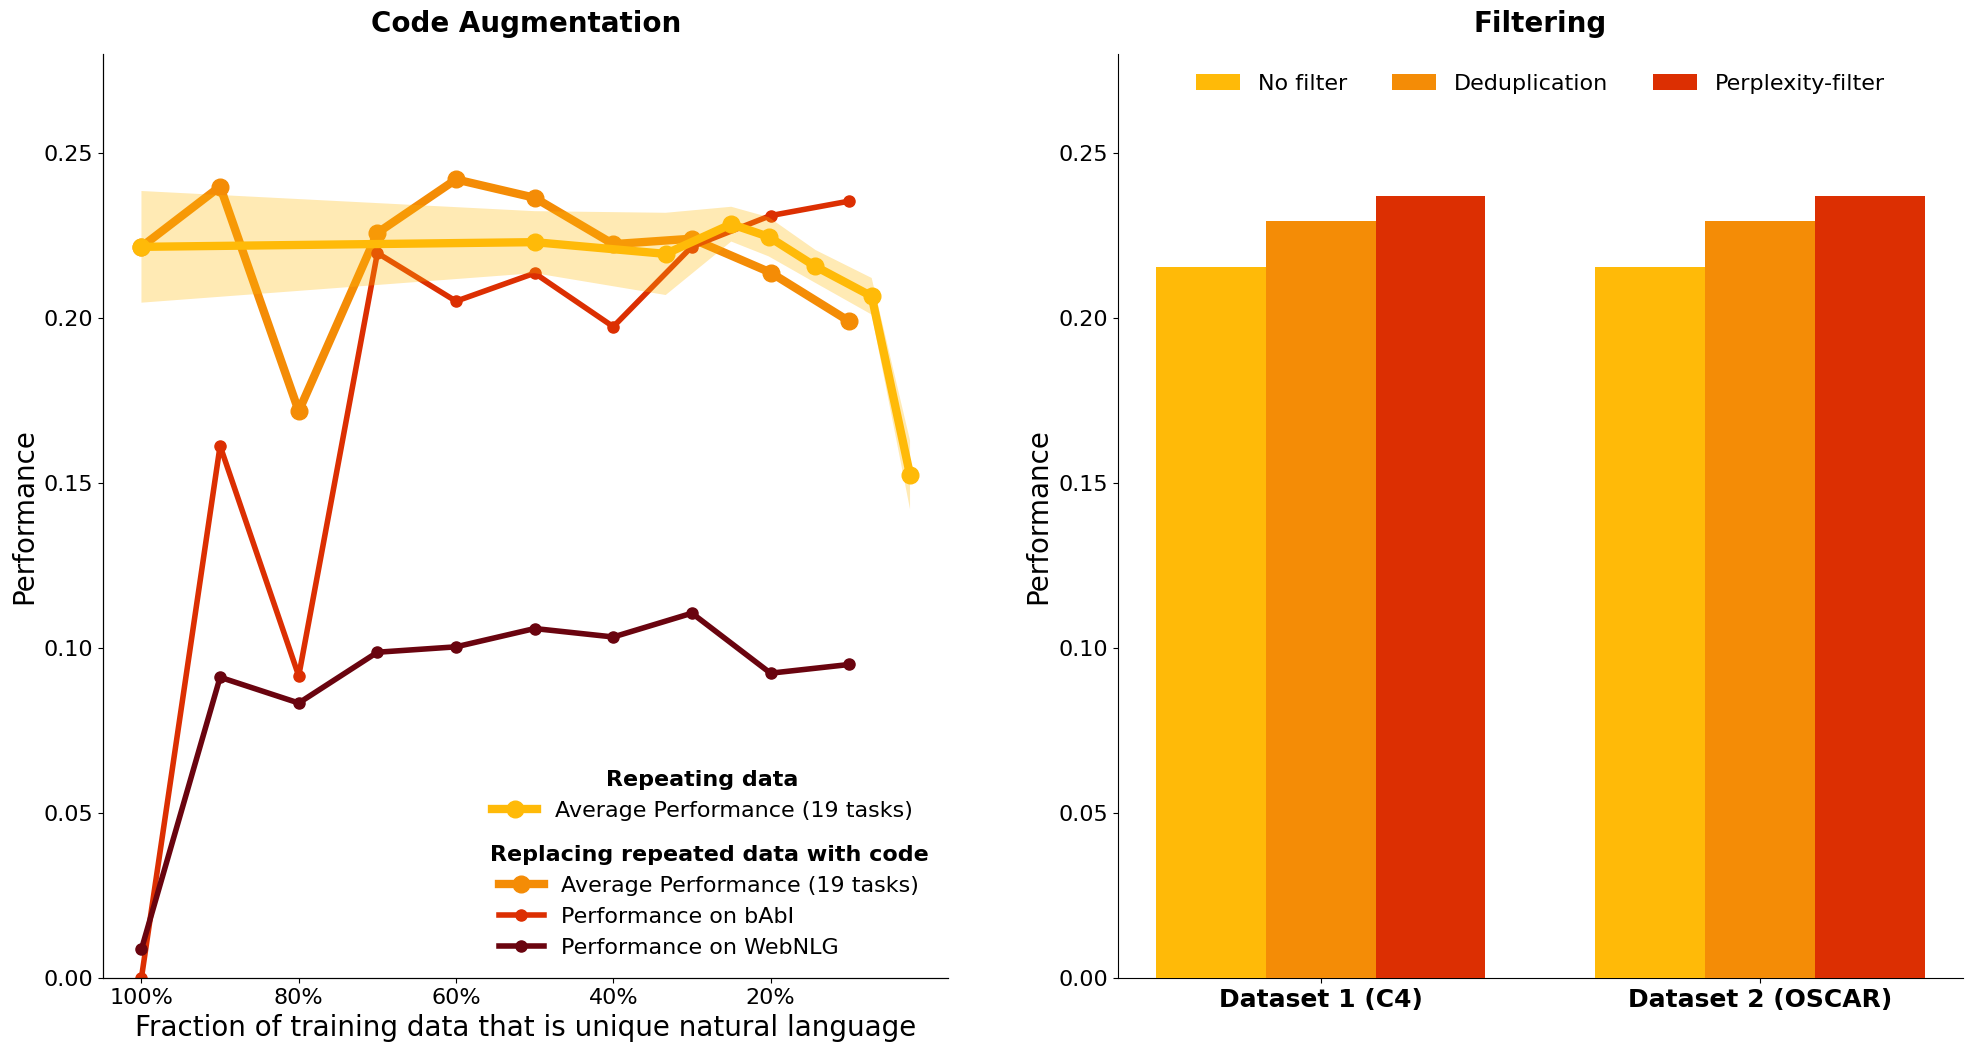

'\nscores_mean = scores\n# scores_mean = [np.mean(x) for x in scores]\n# scores_std = [np.std(x) for x in scores]\n\nx_positions = list(range(len(scores_mean)))\n\nbar = ax_py.bar(\n    x_positions,\n    scores_mean,\n    #yerr=scores_std,\n    color=colors,\n    width=1,\n    zorder=3,\n    edgecolor = "black",\n    linewidth=4,\n)\n\n\ntask = "web_nlg_en"\n\nscores = []\nfor model in c4py:\n    scores.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))\n\nscores_mean = scores\n# scores_mean = [np.mean(x) for x in scores]\n# scores_std = [np.std(x) for x in scores]\n\nx_positions = [len(x_positions) + x + 2 for x in  list(range(len(scores_mean)))]\n\n\nbar = ax_py.bar(\n    x_positions,\n    scores_mean,\n    #yerr=scores_std,\n    color=colors,\n    width=1,\n    zorder=3,\n    edgecolor = "black",\n    linewidth=4,\n)\n\n\n\n\nax_flt.plot(\n    \n)\n'

In [ ]:
from matplotlib.cm import unregister_cmap
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

random.seed(42)
np.random.seed(42)

FONTSIZE = 20
FONTSIZE_SMALL = 16


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
ax_py = axs[0]
ax_flt = axs[1]

ax_py.set_xlabel("Fraction of training data that is unique natural language", fontsize=FONTSIZE)
ax_py.set_ylabel("Performance", fontsize=FONTSIZE)
ax_flt.set_ylabel("Performance", fontsize=FONTSIZE)


#ax_flt.set_ylabel("Validation loss", fontsize=12)


### Options for Py Plot
# Bar: 
## Group of bars for each percentage increasing left to right (e.g. leftmost is 0% w/ avg, babi.. scores, then 10%..)
### ---: People will compare avg vs babi, but that's not maeningful
## Group of bars for each task (E.g. leftmost is average, then bAbi, ...)
### ---: 10 bars for each task -> Can split them into two rows, so 40 total bars
### ---: For bAbI the first bar will be invisible -> Can do improvement over 0 instead, but then relative or absolute? If absolute average score will be tiny; Relative babi will be inf
# Line:
## Line for each score (Avg, bAbi etc)
### ---: People will compare avg vs babi (i.e. the two differnet lines), but that's not meaningful; Need to compare across len of the line!
#### Step plot would put the focus back on comparing the line across itself, but it's ambiguous what the exact performance is at a certain %

### Options for Filtering Plot
# Bar:
## 2 Groups of bars, one for C4, one for OSCAR
### OSCAR: 2.8B/4.2B unique; 4.2B dedup; 4.2B pplx
### C4: 2.8B/4.2B unique ; 2.8B dedup (4.2B: WIP) ; 2.8B / 4.2B: WIP


# "4b284b84bc4v2seed1", "4b284b84bc4v2seed2", "4b284b84bc4v2seed3", "4b284b84bc4v2seed4",

colors = ["#03071E", "#6A040F", "#D00000", "#DC2F02", "#E85D04", "#F48C06",  "#FAA307", "#FFBA08"]#,  "#E85D04", "#F48C06",  "#FAA307", "#FFBA08"]


ckpts = ['4b284b84bc4v2', '4b284b42bc4', '4b284b28bc4', '4b284b21bc4', '4b284b17bc4', '4b284b12bc4', '4b284b6bc4', '4b284b1b9c4']
data = [84e9, 42e9, 28e9, 21e9, 17e9, 12e9, 6e9, 1.9e9]

ax_py2 = ax_py.twinx()

scores = []
scores_std = []
for model in ckpts:
    scores_tasks = []
    for sub_model in [model, model + "seed1", model + "seed2", model + "seed3", model + "seed4"]:
        scores_tasks_sub = []
        for task in MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4-repetitions'][sub_model][0]:
            scores_tasks_sub.append(np.mean([MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4-repetitions'][sub_model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
        print("Num tasks: ", len(scores_tasks_sub))
        # Add bAbI if missing; All non-code models scored 0
        if len(scores_tasks_sub) == 18:
            scores_tasks_sub.append(0)
        assert len(scores_tasks_sub) == 19
        scores_tasks.append(np.mean(scores_tasks_sub))

    scores.append(np.mean(scores_tasks))
    scores_std.append(np.std(scores_tasks))
"""
ax_py.errorbar(
    [(x/84e9)*100 for x in data],
    scores, 
    yerr=scores_std,
)
"""
#"""
ax_py2.plot(
    [(x/84e9)*100 for x in data],
    scores,
    color=colors[-1],
    label="Average Performance (19 tasks)",
    marker=".",
    markersize=24,
    linewidth=6.0,
)

ax_py2.fill_between(
    [(x/84e9)*100 for x in data],
    np.array(scores) - np.array(scores_std), 
    np.array(scores) + np.array(scores_std),
    alpha=0.3,
    facecolor=colors[-1],
)
ax_py2.get_yaxis().set_visible(False)


c4py = ["4b284b84b90c4py", "4b284b84b80c4py", "4b284b84b70c4py", "4b284b84b60c4py", "4b284b84b50c4py", "4b284b84b40c4py", "4b284b84b30c4py", "4b284b84b20c4py", "4b284b84b10c4py",]

scores = [scores[0]]
for model in c4py:
    scores_tasks = []
    for task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][0]:
        scores_tasks.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))

    scores.append(np.mean(scores_tasks))

ax_py.plot(
    list(range(10, 110, 10))[::-1],
    scores,
    color=colors[-3],
    label="Average Performance (19 tasks)",
    linewidth=6.0,
    marker=".",
    markersize=24,    
)


c4py = ["4b284b84bc4v2", "4b284b84b90c4py", "4b284b84b80c4py", "4b284b84b70c4py", "4b284b84b60c4py", "4b284b84b50c4py", "4b284b84b40c4py", "4b284b84b30c4py", "4b284b84b20c4py", "4b284b84b10c4py",]

task = "babi"
scores = []
for model in c4py:
    scores.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))

ax_py.plot(
    list(range(10, 110, 10))[::-1],
    scores,
    color=colors[-5],
    label="Performance on bAbI",
    linewidth=4.0,
    marker=".",
    markersize=16,    
)


task = "web_nlg_en"
scores = []
for model in c4py:
    scores.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))

lines_webnlg = ax_py.plot(
    list(range(10, 110, 10))[::-1],
    scores,
    color=colors[-7],
    label="Performance on WebNLG",
    linewidth=4.0,
    marker=".",
    markersize=16,    
)



x_ticks = list(range(20, 110, 20))[::-1]
x_ticks_str = ["100%", "80%", "60%", "40%", "20%"]
#plt.xticks(x_ticks_loc, x_ticks)
ax_py.set_xticks(x_ticks, x_ticks_str)



ax_py.spines['right'].set_visible(False)
ax_py.spines['top'].set_visible(False)
ax_py2.spines['right'].set_visible(False)
ax_py2.spines['top'].set_visible(False)



ax_py.legend(
    frameon=False,
    fontsize=FONTSIZE_SMALL,
    title="Replacing repeated data with code",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE_SMALL},
   #loc="lower center",
)

ax_py2.legend(
    frameon=False,
    fontsize=FONTSIZE_SMALL,
    title="Repeating data",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE_SMALL},
    loc=(0.45, 0.16),
)


ax_py.tick_params(axis='both', which='major', labelsize=FONTSIZE_SMALL)


ax_py.set_title(r'Code Augmentation', fontsize=FONTSIZE, pad=16, fontweight="bold")



ax_flt.set_title(r'Filtering', fontsize=FONTSIZE, pad=16, fontweight="bold")




ax_flt.tick_params(axis='both', which='major', labelsize=FONTSIZE_SMALL)



scores = []
oscarflt = [
      "4b284b84boscar",
      #"4b284b84boscarseed1",
      #"4b284b84boscarseed2",
      #"4b284b84boscarseed3",
      #"4b284b84boscarseed4",
      "4b284b84boscardedup25expanded",
      "4b284boscarperplexity25",
]

for model in oscarflt:
    scores_tasks = []
    for task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-oscar-perplexity"][model][0]:
        scores_tasks.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-oscar-perplexity"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
    scores.append(np.mean(scores_tasks))

x_positions = list(range(len(scores)))

bar = ax_flt.bar(
    x_positions,
    scores,
    #yerr=scores_std,
    color=[colors[-1], colors[-3], colors[-5]],
    width=1,
    zorder=3,
    #edgecolor = "black",
    linewidth=4,
)


### TODO: C4 ###

scores = []
oscarflt = [
      "4b284b84boscar",
      #"4b284b84boscarseed1",
      #"4b284b84boscarseed2",
      #"4b284b84boscarseed3",
      #"4b284b84boscarseed4",
      "4b284b84boscardedup25expanded",
      "4b284boscarperplexity25",
]

for model in oscarflt:
    scores_tasks = []
    for task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-oscar-perplexity"][model][0]:
        scores_tasks.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-oscar-perplexity"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
    scores.append(np.mean(scores_tasks))

x_positions = [x+4 for x in list(range(len(scores)))]

bar = ax_flt.bar(
    x_positions,
    scores,
    #yerr=scores_std,
    color=[colors[-1], colors[-3], colors[-5]],
    width=1,
    zorder=3,
    #edgecolor = "black",
    linewidth=4,
)

ax_flt.set_xticks(
    [1, 5],
    ["Dataset 1 (C4)", "Dataset 2 (OSCAR)"],
    fontsize=FONTSIZE-2,
    fontweight="bold", 
    #pad=30,
)


ax_flt.legend(
    [x for x in bar], 
    ["No filter", "Deduplication", "Perplexity-filter"], 
    #title="Epochs", 
    fontsize=FONTSIZE_SMALL,
    frameon=False,
    ncol=3,
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},
    #columnspacing=0.9,
    loc="upper center"#-0.3, 0.9), #

)

ax_py.set_ylim(0, 0.28)
ax_py2.set_ylim(ax_py.get_ylim())

ax_flt.set_ylim(0, 0.28)

ax_flt.spines['right'].set_visible(False)
ax_flt.spines['top'].set_visible(False)


plt.savefig(f"beyond.pdf", bbox_inches="tight")

plt.show()

"""
scores_mean = scores
# scores_mean = [np.mean(x) for x in scores]
# scores_std = [np.std(x) for x in scores]

x_positions = list(range(len(scores_mean)))

bar = ax_py.bar(
    x_positions,
    scores_mean,
    #yerr=scores_std,
    color=colors,
    width=1,
    zorder=3,
    edgecolor = "black",
    linewidth=4,
)


task = "web_nlg_en"

scores = []
for model in c4py:
    scores.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))

scores_mean = scores
# scores_mean = [np.mean(x) for x in scores]
# scores_std = [np.std(x) for x in scores]

x_positions = [len(x_positions) + x + 2 for x in  list(range(len(scores_mean)))]


bar = ax_py.bar(
    x_positions,
    scores_mean,
    #yerr=scores_std,
    color=colors,
    width=1,
    zorder=3,
    edgecolor = "black",
    linewidth=4,
)




ax_flt.plot(
    
)
"""




Num tasks:  19
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Num tasks:  18
Missing:  4b284bc4dedup piqa
Missing:  4b284bc4dedup sciq


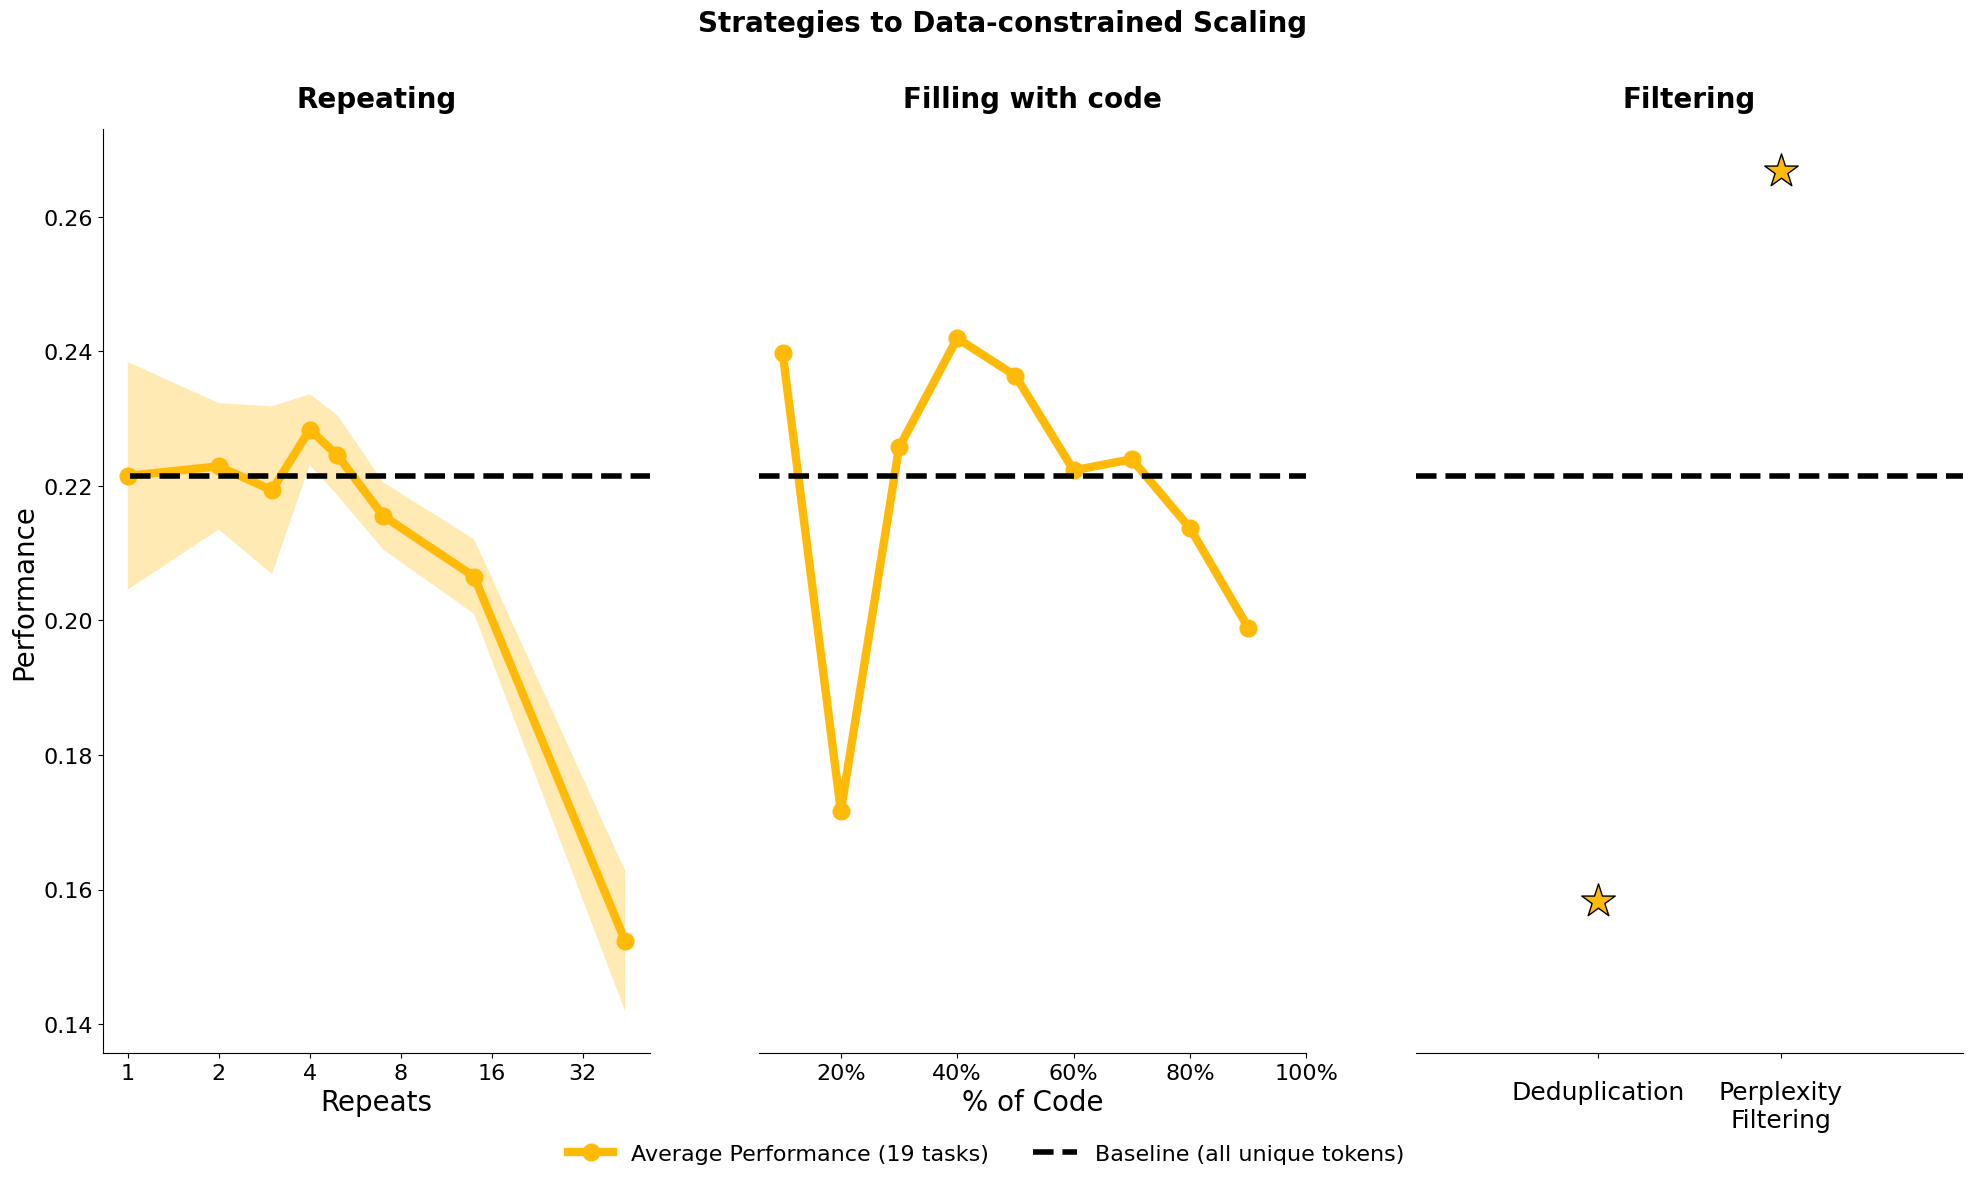

In [ ]:
from matplotlib.cm import unregister_cmap
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

random.seed(42)
np.random.seed(42)

FONTSIZE = 20
FONTSIZE_SMALL = 16

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 12), sharey=True)
ax_rp = axs[0]
ax_py = axs[1]
ax_flt = axs[2]

ax_rp.set_ylabel("Performance", fontsize=FONTSIZE)
ax_rp.set_xlabel("Repeats", fontsize=FONTSIZE)
ax_py.set_xlabel("% of Code", fontsize=FONTSIZE)

ax_rp.tick_params(axis='both', which='major', labelsize=FONTSIZE_SMALL)
ax_rp.set_title(r'Repeating', fontsize=FONTSIZE, pad=16, fontweight="bold")
ax_py.tick_params(axis='both', which='major', labelsize=FONTSIZE_SMALL)
ax_py.set_title(r'Filling with code', fontsize=FONTSIZE, pad=16, fontweight="bold")
ax_flt.set_title(r'Filtering', fontsize=FONTSIZE, pad=16, fontweight="bold")
ax_flt.tick_params(axis='both', which='major', labelsize=FONTSIZE_SMALL)

fig.suptitle('Strategies to Data-constrained Scaling', fontsize=FONTSIZE, fontweight="bold")
 

colors = ["#03071E", "#6A040F", "#D00000", "#DC2F02", "#E85D04", "#F48C06",  "#FAA307", "#FFBA08"]#,  "#E85D04", "#F48C06",  "#FAA307", "#FFBA08"]
ckpts = ['4b284b84bc4v2', '4b284b42bc4', '4b284b28bc4', '4b284b21bc4', '4b284b17bc4', '4b284b12bc4', '4b284b6bc4', '4b284b1b9c4']
data = [84e9, 42e9, 28e9, 21e9, 17e9, 12e9, 6e9, 1.9e9]

scores = []
scores_std = []
for model in ckpts:
    scores_tasks = []
    for sub_model in [model, model + "seed1", model + "seed2", model + "seed3", model + "seed4"]:
        scores_tasks_sub = []
        for task in MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4-repetitions'][sub_model][0]:
            scores_tasks_sub.append(np.mean([MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4-repetitions'][sub_model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
        print("Num tasks: ", len(scores_tasks_sub))
        # Add bAbI if missing; All non-code models scored 0
        if len(scores_tasks_sub) == 18:
            scores_tasks_sub.append(0)
        assert len(scores_tasks_sub) == 19
        scores_tasks.append(np.mean(scores_tasks_sub))

    scores.append(np.mean(scores_tasks))
    scores_std.append(np.std(scores_tasks))


BASE_AVG = scores[0]

"""
ax_py.errorbar(
    [(x/84e9)*100 for x in data],
    scores, 
    yerr=scores_std,
)
"""
ax_rp.plot(
    np.log10([(84e9/x) for x in data]),
    scores,
    color=colors[-1],
    label="Average Performance (19 tasks)",
    marker=".",
    markersize=24,
    linewidth=6.0,
)

ax_rp.fill_between(
    np.log10([(84e9/x) for x in data]),
    np.array(scores) - np.array(scores_std), 
    np.array(scores) + np.array(scores_std),
    alpha=0.3,
    facecolor=colors[-1],
)

"""webnlg
task = "web_nlg_en"
scores = []
scores_std = []
for model in ckpts:
    scores_tasks = []
    for sub_model in [model, model + "seed1", model + "seed2", model + "seed3", model + "seed4"]:
        scores_tasks.append(
            np.mean([MODEL_TO_FEWSHOT_SCORES['lm1-4b2-84b-c4-repetitions'][sub_model][shot][task] for shot in [0, 1, 2, 3, 4, 5]])
        )

    scores.append(np.mean(scores_tasks))
    scores_std.append(np.std(scores_tasks))


ax_rp.plot(
    np.log10([(84e9/x) for x in data]),
    scores,
    color=colors[-3],
    label="WebNLG",
    marker=".",
    markersize=24,
    linewidth=6.0,
)

ax_rp.fill_between(
    np.log10([(84e9/x) for x in data]),
    np.array(scores) - np.array(scores_std), 
    np.array(scores) + np.array(scores_std),
    alpha=0.3,
    facecolor=colors[-1],
)
"""

"""babi
task = "babi"
scores = []
scores_std = []
for model in ckpts:
    scores_tasks = []
    for sub_model in [model, model + "seed1", model + "seed2", model + "seed3", model + "seed4"]:
        scores_tasks.append(0)

    scores.append(np.mean(scores_tasks))
    scores_std.append(np.std(scores_tasks))

ax_rp.plot(
    np.log10([(84e9/x) for x in data]),
    scores,
    color=colors[-5],
    label="bAbI",
    marker=".",
    markersize=24,
    linewidth=6.0,
)

ax_rp.fill_between(
    np.log10([(84e9/x) for x in data]),
    np.array(scores) - np.array(scores_std), 
    np.array(scores) + np.array(scores_std),
    alpha=0.3,
    facecolor=colors[-1],
)
"""

ax_rp.spines['right'].set_visible(False)
ax_rp.spines['top'].set_visible(False)

ax_rp.set_xticks(np.log10([1, 2, 4, 8, 16, 32]), [1, 2, 4, 8, 16, 32])





c4py = ["4b284b84b90c4py", "4b284b84b80c4py", "4b284b84b70c4py", "4b284b84b60c4py", "4b284b84b50c4py", "4b284b84b40c4py", "4b284b84b30c4py", "4b284b84b20c4py", "4b284b84b10c4py",]

scores = []
for model in c4py:
    scores_tasks = []
    for task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][0]:
        scores_tasks.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
    scores.append(np.mean(scores_tasks))

ax_py.plot(
    list(range(10, 100, 10)),
    scores,
    color=colors[-1],
    label="Average Performance (19 tasks)",
    linewidth=6.0,
    marker=".",
    markersize=24,    
)
"""
task = "web_nlg_en"
scores = []
for model in c4py:
    scores.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))

ax_py.plot(
    list(range(10, 100, 10)),
    scores,
    color=colors[-3],
    label="Performance on WebNLG",
    linewidth=6.0,
    marker=".",
    markersize=24,
)
"""
"""babi
task = "babi"
scores = []
for model in c4py:
    scores.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4py"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))

ax_py.plot(
    list(range(10, 100, 10)),
    scores,
    color=colors[-5],
    label="Performance on bAbI",
    linewidth=6.0,
    marker=".",
    markersize=24,
)
"""

x_ticks = list(range(20, 110, 20))
x_ticks_str = ["100%", "80%", "60%", "40%", "20%"][::-1]
#plt.xticks(x_ticks_loc, x_ticks)
ax_py.set_xticks(x_ticks, x_ticks_str)
#ax_py.set_xlim(ax_py.get_xlim()[::-1])


ax_py.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax_py.spines['left'].set_visible(False)
ax_py.spines['right'].set_visible(False)
ax_py.spines['top'].set_visible(False)
ax_py.get_yaxis().set_visible(False)

scores = []
flt = [
      "4b284bc4dedup",
      "perplexity25",
]

for model in flt:
    scores_tasks = []
    for task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4-perplexity"][model][0]:
        if task in MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4-perplexity"][model][5]:
            scores_tasks.append(np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-c4-perplexity"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]))
        else:
            print("Missing: ", model, task)
    scores.append(np.mean(scores_tasks))


x_positions = list(range(len(scores)))

ax_flt.scatter(
    [1, 2],
    scores,
    s=640,
    color=colors[-1],
    marker="*",
    edgecolor="black"
)


"""webnlg
task = "web_nlg_en"
scores = []
for model in oscarflt:
    scores.append(
        np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-oscar-perplexity"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]) / 4
    )

x_positions = list(range(len(scores)))

ax_flt.scatter(
    [1, 2],
    scores,
    s=640,
    color=colors[-3],
    marker="*",
    edgecolor="black"
)

"""

"""babi
task = "babi"
scores = []
for model in oscarflt:
    scores.append(0)
    #scores.append(
    #    np.mean([MODEL_TO_FEWSHOT_SCORES["lm1-4b2-84b-oscar-perplexity"][model][shot][task] for shot in [0, 1, 2, 3, 4, 5]]) / 4
    #)

x_positions = list(range(len(scores)))

ax_flt.scatter(
    [1, 2],
    scores,
    s=640,
    color=colors[-5],
    marker="*",
    edgecolor="black"
)

"""

ax_flt.set_xticks(
    [1, 2],
    ["Deduplication", "Perplexity\nFiltering"],
    fontsize=FONTSIZE-2,
    #fontweight="bold", 
    #pad=32,
)
ax_flt.tick_params(axis='both', which='major', pad=16)

ax_flt.set_xlim(
    (0, 3)
)


ax_flt.spines['left'].set_visible(False)
ax_flt.spines['right'].set_visible(False)
ax_flt.spines['top'].set_visible(False)
ax_flt.get_yaxis().set_visible(False)


ax_rp.axhline(y=BASE_AVG, xmin=0.05, xmax=1, color="black", linestyle="--", linewidth=4.0, label="Baseline (all unique tokens)")
ax_py.axhline(y=BASE_AVG, xmin=0, xmax=1, color="black", linestyle="--", linewidth=4.0)
ax_flt.axhline(y=BASE_AVG, xmin=0, xmax=1, color="black", linestyle="--", linewidth=4.0)



handles, labels = ax_rp.get_legend_handles_labels()

fig.legend(
    handles,
    labels,
    loc='lower center', 
    ncol=4, 
    frameon=False, 
    fontsize=FONTSIZE_SMALL,
)





plt.savefig(f"beyondv1.pdf", bbox_inches="tight")
plt.show()


